# **Auction Hunters**
## Exploratory Data Analysis Project
## Part 2: Exploratory Data Analysis
#### Joshua Higgins | October 2023 ~

## ❓ Confirm Part 1 - Data Pre-processing❓
* If you didn't see how I got here, check out the link below to the data collection, cleaning and verification (pre-processing) notebook.
   * You can find that here: [Part 1: Pre-processing!](https://github.com/Joshua-Higgins-jp/Auction_Hunters_EDA/blob/master/auction_hunters_preprocessing.ipynb)

## Objectives
* Import the cleaned data
* Perform a simple EDA on the data
   * Ask Questions and Answer them with data :)
* BONUS!? Rating prediction based on financial data?

## Questions

#### Financial Analysis
* 1.1. What are the best and worst performing episodes per season (Paid, Sold, Profit)?
* 1.2. What are the 3 best and worst performing episodes over the entire series (Paid, Sold, Profit)?
* 1.3. What is the profit margin per episode?
* 1.4. What is the return on investment per episode?
* 1.5. What is the relative Paid, Sold, Profit normalised for number of episodes per season?
* 1.6. What is the rank of best performing seasons using the relative Paid, Sold and Profit?

#### Location Analysis
* 2.1. How many times did Allen and Ton visit each state per season?
* 2.2. How many times did Allen and Ton visit each state in the entire series?
* 2.3. Which state has the best profit margin?
* 2.4. Which state has the best return on investment?

#### Time Analysis
* 3.1. How has paid, sold and profit trended with time (season 1 to season 5)?
* 3.2. When were the peak profit and peak profit margin metrics attained?
* 3.3. How were paid, sold, profit, ROI and Profit Margins affected by year?
* 3.4. How were paid, sold, profit, ROI and Profit Margins affected by season?

#### Rating Analysis
* 4.1. What is the best episode per season?
* 4.2. What is the worst episode per season?
* 4.3. What are the top 5 episodes of the series?
* 4.4. What are the worst 5 episodes of the series?

#### Data Science
* 5.1. NLP: Is there a relationship between episode description sentiment and viewer rating?
* 5.2. NLP: Is there a relationship between episode description sentiment and financial metrics?
* 5.3. Is there a relationship between viewer rating and financial metrics?
   * Can you predict the viewer rating from the financial metrics, and/or vice versa?

# 📦 **Storage Unit Auction:** 

* People can keep their belongings in a storage unit for a fee. It's like having an offsite garage for your personal items that you cannot keep at home.
* If a customer stops paying their unit fee, the company owning the storage unit can auction off the contents to vacate it and make way for another customer.
* Some people make a living off of buying these "abandoned" storage units and then selling the contents for a profit.
* Before buying a storage unit, potential buyers are not allowed inside the unit. 
   * They can only see from the open door what is inside. Torches and binoculars are allowed.
* There is a risk that a purchsed unit will have nothing of value, rendering the purchase of the unit a loss.
* However, for experienced people with connections to the right buyers, they can turn a hundred dollar purchase into thousands of dollars worth of sales and profits.
* Deciding how much to bid for a unit, including the critical max bid, comes down to **_profiling_** the unit:
   * e.g. how the contents are protected, stored, visible contents, and knowledge of used resale value.
   * You won't have time to research items during profiling, so experience selling used goods is essential to making profit.

# Definitions

* 💰 **Paid:** Refers to the amount of money paid for all of the won storage unit(s) in one episode.
* 💰 **Sold:** Refers to the amount of money made from selling the contents of the storage units they successfully won at auction.
* 💰 **Profit:** Refers to the amount of money made from selling the contents of the storage unit minus the purchase price (profit = sold - paid).

# (I) Imports and Globals

In [177]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick



In [ ]:
DATA_DIR = "data"
MONETARY_COLS = ['paid_', '$sold_$', 'profit_$']

# (II) Importing Cleaned Data

In [ ]:
# Set Pandas display options so that we can see the entire dataframe.
pd.set_option('display.max_rows', None)     # Shows all rows
pd.set_option('display.max_columns', None)  # Shows all columns
pd.set_option('display.width', None)        # Adjusts the display width

In [ ]:
prepared_pickle = f"{DATA_DIR}/final_dataset_auction_hunters.pkl"
with open(prepared_pickle, 'rb') as file:
    df = pickle.load(file)

In [ ]:
df.head(3)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,description,paid_$,sold_$,profit_$,rating,votes,api_rating,api_votes,1,2,3,4,5,6,7,8,9,10
0,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,Ton and Allen head to auctions in the desert t...,376,1190,814,7.8,34.0,7.56,55.0,1.0,0.0,0.0,1.0,1.0,10.0,14.0,13.0,6.0,9.0
1,1,2,102,The Big Score,"Downtown Los Angeles, California",2010-11-09,Ton and Allen bid on units in downtown LA and ...,2025,5850,3825,6.5,26.0,7.18,44.0,1.0,0.0,0.0,1.0,1.0,10.0,15.0,8.0,3.0,5.0
2,1,3,103,Ton's Got a Gun,"Mission Hills, California",2010-11-16,Allen encounters some old rivals in the Valley...,1900,9450,7550,6.8,20.0,7.69,39.0,0.0,0.0,0.0,0.0,1.0,6.0,13.0,10.0,2.0,7.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   season_num    107 non-null    int8          
 1   episode_num   107 non-null    int8          
 2   unique_ep_ID  107 non-null    int16         
 3   episode_name  107 non-null    object        
 4   location      107 non-null    object        
 5   air_date      107 non-null    datetime64[ns]
 6   description   107 non-null    object        
 7   paid_$        107 non-null    int32         
 8   sold_$        107 non-null    int32         
 9   profit_$      107 non-null    int32         
 10  rating        75 non-null     float64       
 11  votes         75 non-null     float64       
 12  api_rating    105 non-null    float64       
 13  api_votes     105 non-null    float64       
 14  1             105 non-null    float64       
 15  2             105 non-null    float64   

**👍 Looks Ok. Let's get started!**

# (III) Show the dataframe record for a single specific episode

**✈️ This is a quick and easy to use code snippet to speed up grabbing a single record**

In [121]:
def show_me(dataframe_name, unique_ep_ID):
    """
    Enter a dataframe name that contains the unique_ep_ID column, and an episode number.
    See the results displayed as a dataframe.
    """
    result = dataframe_name[dataframe_name['unique_ep_ID'] == unique_ep_ID]
    return result

# 1. Financial Analysis

## 1.1. What is the best and worst performing episode per season financially (Paid, Sold, Profit)?

* 🏹 To tackle this problem, I will generate dataframes for each paid, sold and profit categories. 
   * 👉 Each dataframe will have the best and worst episode by category.
* 🏹 Then, I will visualise each datagrame in bar plots.

### 1.1.1. Generate Dataframes

In [129]:
def min_or_max_feature_by_season(dataframe, min_or_max="min", feature_col='profit_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=False):
    """
    Pass in a dataframe, specify the most_feature column, prints text for the most_feature for each season.
    min_or_max is used to select which feature to select from each season.
    
    Dataframe contains columns: 
    ['season_num', 'episode_num', 'unique_ep_ID', 'episode_name', 'location', 
    'air_date', 'description', 'paid_$', 'sold_$', 'profit_$', 'rating',
    'votes', 'api_rating', 'api_votes', '1', '2', '3', '4', '5', '6', '7',
    '8', '9', '10']
    
    Unit is for monetary values $. If None, then no unit. Else, it will print the output sentence with your unit.
    
    Returns a dataframe of only the output values.
    """
    if min_or_max not in ["min", "max"]:
        raise ValueError("min_or_max argument must be 'min' or 'max'. Check input and try again.")
    
    feature_by_season_list_of_dicts = []
    
    df = dataframe
    season_num_list = df[season_col].unique()
    
    for season in season_num_list:
        season_df = df[df[season_col] == season]
        
        feature_id = season_df[feature_col].idxmax() if min_or_max == "max" else season_df[feature_col].idxmin()
        
        feature_ep_ID = season_df.loc[feature_id, 'unique_ep_ID']
        feature_episode_name = season_df.loc[feature_id, 'episode_name']
        feature_value = season_df.loc[feature_id, feature_col]
        #feature_location = season_df.loc[feature_id, 'location']
        
        ep_dict = {
            'season_num': season,
            'unique_ep_ID': feature_ep_ID,
            'episode_name': feature_episode_name,
            #'location': feature_location,
            feature_col: feature_value
        }
        
        if feature_col in monetary_cols:
            unit = '$'
        else:
            unit = None
        
        feature_by_season_list_of_dicts.append(ep_dict)
    
    result_df = pd.DataFrame.from_records(feature_by_season_list_of_dicts, index=['season_num'])
    
    if show_table is True:
        if min_or_max == "min": 
            print(f"\n💸 {min_or_max.capitalize()} {feature_col}:")
        if min_or_max == "max":
            print(f"\n🥇 {min_or_max.capitalize()} {feature_col}:")
        print(result_df.reset_index())
        print("--------------------------------------------------------------")
    
    return result_df.reset_index() # this allows the season_num column to be accessed as a column later :)

In [135]:
max_paid_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="max", feature_col='paid_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
min_paid_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="min", feature_col='paid_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
max_sold_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="max", feature_col='sold_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
min_sold_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="min", feature_col='sold_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
max_profit_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="max", feature_col='profit_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
min_profit_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="min", feature_col='profit_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)


🥇 Max paid_$:
   season_num  unique_ep_ID          episode_name  paid_$
0           1           105        The Real Thing    2450
1           2           204        Disco and Dice    3450
2           3           301  Auction Hunters Live    5000
3           4           423  Cashville, Tennessee   12800
4           5           509    Louisiana Purchase   16500
--------------------------------------------------------------

💸 Min paid_$:
   season_num  unique_ep_ID                 episode_name  paid_$
0           1           106  Weapons of Past Destruction     295
1           2           218                Viva la Vegas     320
2           3           307              High Flying Ton     450
3           4           412            Don't Taze Me Bro       5
4           5           506                Risk & Reward     410
--------------------------------------------------------------

🥇 Max sold_$:
   season_num  unique_ep_ID            episode_name  sold_$
0           1           103    

### 1.1.2. Visualising the Dataframe Tables

In [314]:
def plot_min_max_ep_by_season(min_df, max_df, category: str):
    """
    Choose a category such as paid, sold, profit. Then pass in your min and max dataframes from the selected category.
    """
    
    ax_font_size = 10
    title_font_size = 12
    annot_font_size = 8
    ax_ticks_font_size = 8
    
    if category not in ["paid", "sold", "profit"]:
        raise ValueError("min_or_max argument must be 'paid', 'sold' or 'profit'. Check input and try again.") 
        
    cat_to_col_dict = {"paid":"paid_$", 
                       "sold":"sold_$", 
                       "profit":"profit_$"}
    
    x_col = cat_to_col_dict[category]
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))
    
    # Plot minimum values on the left subplot
    ax1 = sns.barplot(x=x_col, 
                     y="season_num", 
                     data=min_df, 
                     hue="season_num", 
                     dodge=False, 
                     orient='h',
                     palette="Set1",
                     ax=axes[0])

    for index, row in min_df.iterrows():
        ax1.text(row[x_col], 
                 index, 
                 f"Ep# {row['unique_ep_ID']} (${row[x_col]})\n{row['episode_name']}", 
                 va='center').set_fontsize(annot_font_size)

    ax1.set_xlabel(f"{category.capitalize()} ($)", fontsize=ax_font_size, weight="bold")
    ax1.set_ylabel('Season #', fontsize=ax_font_size, weight="bold")
    ax1.set_title(f"Auction Hunters: Episodes of Min {category.capitalize()}", weight='bold', fontsize=title_font_size)
    # ax1.set_xlim(0, min_df[x_col].max() + 10000)
    ax1.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)

    if min_df[x_col].min() > 0:
        ax1.set_xlim(0.75*min_df[x_col].min(), 1.25*min_df[x_col].max())
    else:
        ax1.set_xlim(1.25*min_df[x_col].min(), 1.25*min_df[x_col].max())


    ax1.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

    # Plot maximum values on the right subplot
    ax2 = sns.barplot(x=x_col, 
                     y="season_num", 
                     data=max_df, 
                     hue="season_num", 
                     dodge=False, 
                     orient='h',
                     palette="Set1",
                     ax=axes[1])

    for index, row in max_df.iterrows():
        ax2.text(row[x_col], 
                 index, 
                 f"Ep# {row['unique_ep_ID']} (${row[x_col]})\n{row['episode_name']}", 
                 va='center').set_fontsize(annot_font_size)

    ax2.set_xlabel(f"{category.capitalize()} ($)", fontsize=ax_font_size, weight="bold")
    ax2.set_ylabel('Season #', fontsize=ax_font_size, weight="bold")
    ax2.set_title(f"Auction Hunters: Episodes of Max {category.capitalize()}", weight='bold', fontsize=title_font_size)
    ax2.set_xlim(0, max_df[x_col].max() + 10000)
    ax2.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)

    ax2.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    
    plt.tight_layout()
    plt.show()

#### 1.1.2.1. Min and Max Paid by Season

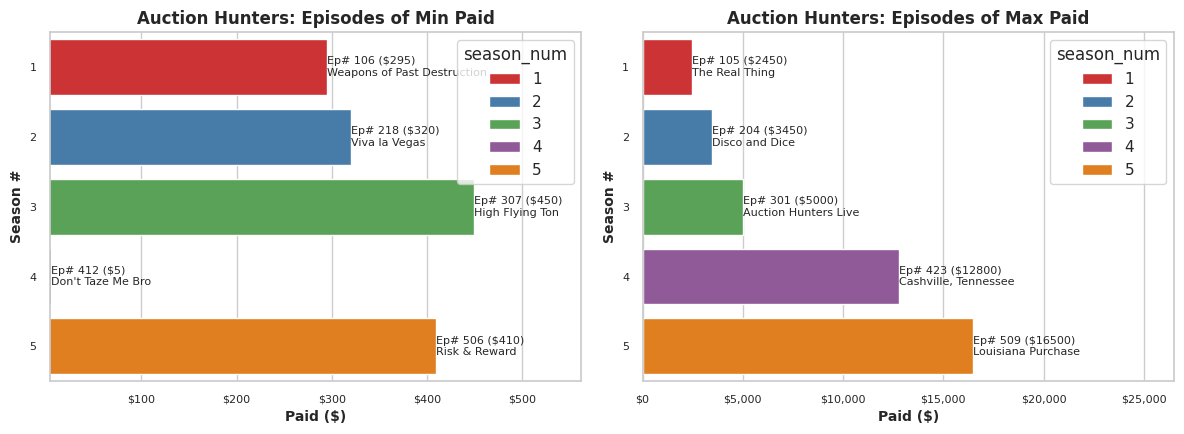

In [315]:
plot_min_max_ep_by_season(min_df=min_paid_ep_by_season_df,
                          max_df=max_paid_ep_by_season_df,
                          category="paid")

#### 1.1.2.2. Paid Findings by Season

* 🕵️ There is a general upwards trend in both the min and max tables.
   * This could be due to confidence in storage unit purchses and turning it around into profit.
   * It could also imply more risk is taken in buying units, trusting their experience to turn it into profit.
   * Perhaps the storage unit locations they visit are more targeted towards higher class people, more likely to store expensive or rare items.
      * i.e. a more secure storage unit facility is more likely to be used for storing expensive things ;)
* 🕵️ However, in season 4 - episode 412, the min unit paid price was just $5. 
   * If something valuable was in this unit, this could mean a very high profit and profit margin!

#### 1.1.2.3. Min and Max Sold

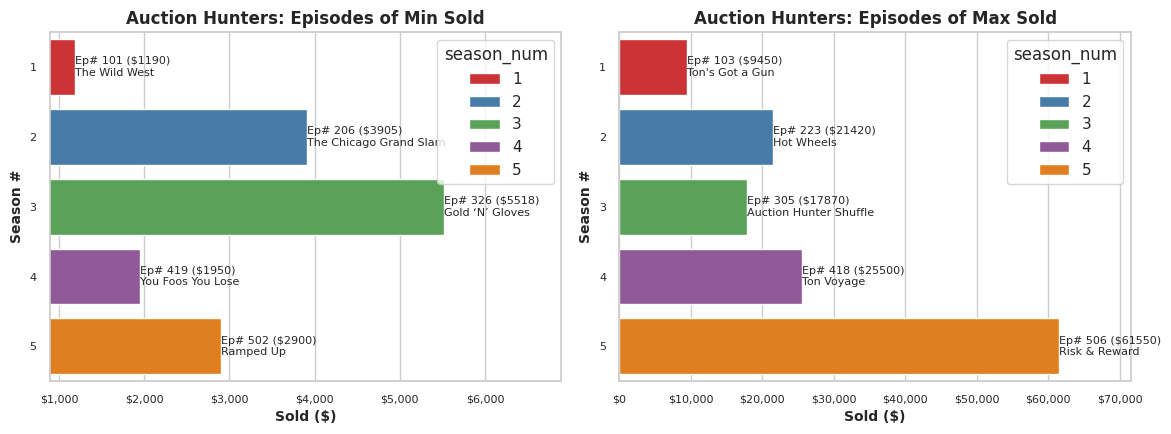

In [316]:
plot_min_max_ep_by_season(min_df=min_sold_ep_by_season_df,
                          max_df=max_sold_ep_by_season_df,
                          category="sold")

#### 1.1.2.4. Sold Findings by Season

* 🕵️ There is a general upwards trend in ONLY the max table.
   * This indicates the value of the contents of the won auction units increased and sale prices were negotiated and remained high.
* 🕵️ There is no obvious consistency in the min table.
   * The min sold increases to a solid value of 5518 in season 3 episode 326, but then drops significantly in season 4 to 1950.

#### 1.1.2.5. Min and Max Profit

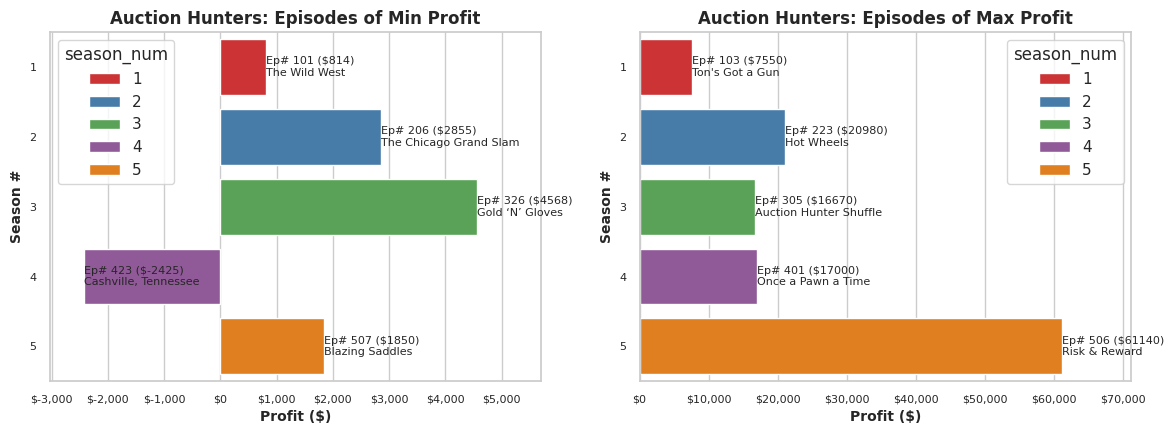

In [317]:
plot_min_max_ep_by_season(min_df=min_profit_ep_by_season_df,
                          max_df=max_profit_ep_by_season_df,
                          category="profit")

#### 1.1.2.6. Profit Findings by Season

* 🕵️ There is a general upwards trend in only the max table.
   * Generally the max profit for a unit is 7.5k-21k.
   * Season 5 episode 506 has an enormous profit, almost 3x the max profit of other seasons.
      * I extracted the description for that episode. The boys sold some famous street art, explaining the high profit ;)
* 🕵️ The min profit appears to increase each season, then in season 4 drops to negative.
   * Episode 423 appears to have lost money. This indicates that too much was paid for the unit, or the contents weren't as good as expected, or both.

In [ ]:
ep_506_description = df.loc[df['unique_ep_ID'] == 506, 'description'].values[0]
print(ep_506_description)

The guys arrive late to an auction and uncover vintage bear traps and a collection of street art possibly belonging to graffiti artist RISK.


## 1.2. What are the 3 best and worst performing episodes for the entire series (Paid, Sold, Profit)?

* 🏹 To tackle this problem, I will first start by showing the entire series data for each category.
* 🏹 Then, I will create dataframes ranking each category.

### 1.2.1. Paid, Sold, Profit Categories for Series Data - Visualisation

In [141]:
def show_basic_feature_plot(dataframe, feature_col, unit):
    """
    Takes a dataframe with 'season_num', 'unique_ep_ID' and other monetary values and plots them, index vs. feature_col.
    """
    
    if unit not in ["$", "%"]:
        raise ValueError("Unit must be '$' or '%'. Check input and try again.") 
        
    df = dataframe

    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=df, x=df.index, y=feature_col, hue='season_num', palette='Set1')

    # Initialize a counter to keep track of the episode index across seasons
    episode_counter = 0

    # Annotate the line with unique_ep_ID
    for line in ax.lines:
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        for x, y in zip(x_data, y_data):
            unique_ep_ID = df.loc[episode_counter, 'unique_ep_ID']
            ax.annotate(f'{unique_ep_ID}', (x, y), textcoords='offset points', xytext=(0, 10), ha='center', fontsize=6)
            episode_counter += 1  # Increment the episode counter

    plt.xlabel('Episode Index (Number)', weight='bold')
    plt.ylabel(f"{feature_col.capitalize()}", weight='bold')
    plt.title(f"{feature_col.capitalize()} vs. Episode Index (with unique episode ID annotations)", weight='bold', fontsize=16)
    plt.legend(title='Season')

    # Add more gridlines
    ax.set_xticks(range(0, len(df), 10))

    # Format y-axis labels with comma separator
    if unit == "$":
        ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    if unit == "%":
        ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}%'))

    plt.grid(True)  # Add grid lines to both x and y axes
    plt.tight_layout()
    plt.show()

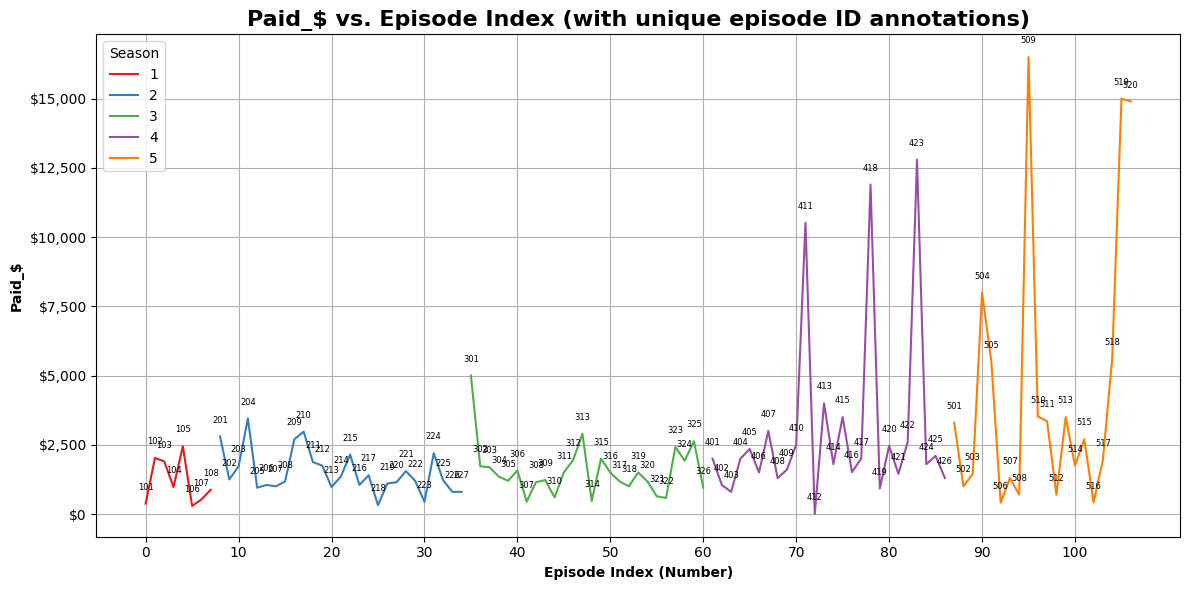

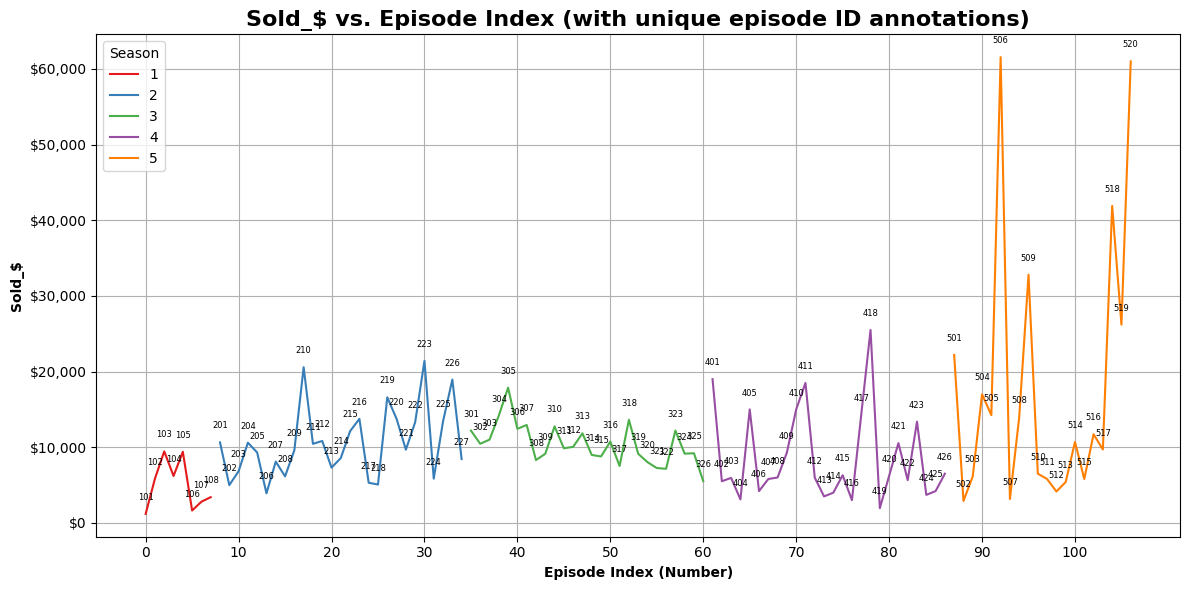

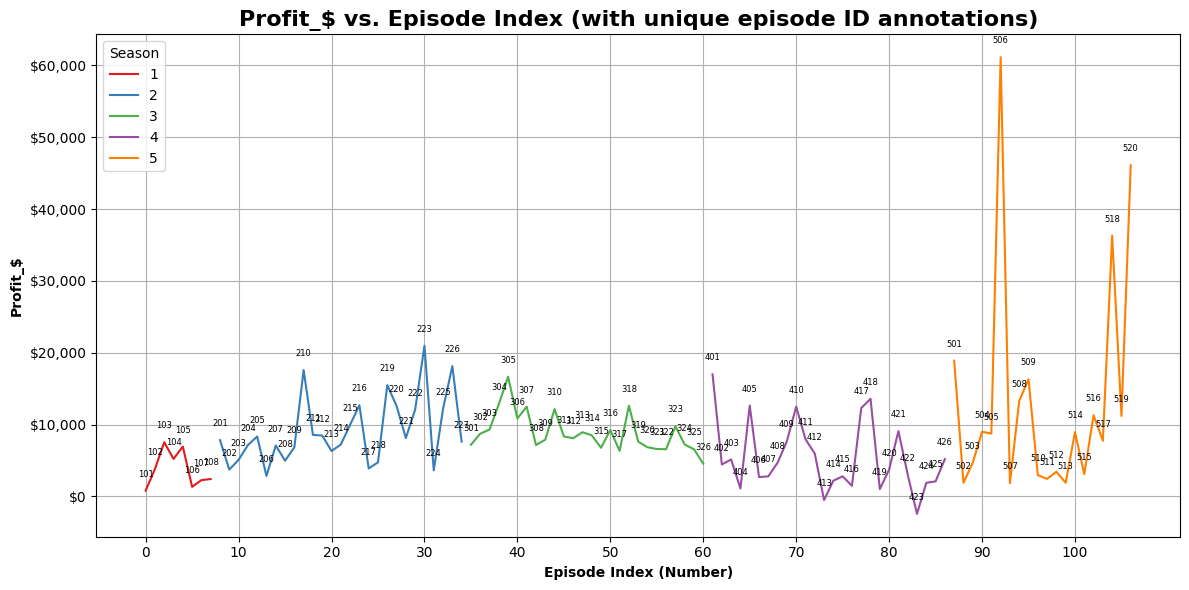

In [142]:
list_of_features_to_plot = ['paid_$', 'sold_$', 'profit_$']
for feature in list_of_features_to_plot:
    show_basic_feature_plot(df, feature, "$")

### 1.2.2. Generating 3 Dataframes for the best and worst category episodes across the entire series.

**☝️ First, I will make a simplified dataframe**

In [ ]:
threes_cols = [
    'season_num', 
    'episode_num', 
    'unique_ep_ID',
    'episode_name',
    'location',
    'air_date', 
    'paid_$', 
    'sold_$', 
    'profit_$'
]

In [105]:
df_threes = df.loc[:, threes_cols]

#### 1.2.2.1. The 3 "Best" Performing: Paid. i.e. **3 Cheapest Purchased Units**

In [ ]:
df_threes.sort_values(by='paid_$', ascending=True).head(3)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
72,4,12,412,Don't Taze Me Bro,"Stanton, California",2013-04-13,5,5970,5965
5,1,6,106,Weapons of Past Destruction,Sunset Boulevard,2010-12-07,295,1635,1340
25,2,18,218,Viva la Vegas,"Henderson, Nevada",2011-08-30,320,5070,4750


#### 1.2.2.2. The 3 "Worst" Performing: Paid i.e. **3 Most Expensive Purchased Units**

In [ ]:
df_threes.sort_values(by='paid_$', ascending=False).head(3)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
95,5,9,509,Louisiana Purchase,Louisiana,2014-12-20,16500,32800,16300
105,5,19,519,Brew-Phoria,"Mission Hills, California",2015-05-09,15000,26200,11200
106,5,20,520,Catch My Drift?,"Norwalk, California",2015-05-09,14900,61000,46100


#### 1.2.2.3. The 3 "Best" Performing: Sold. i.e. **3 Highest Valued Content Units**

In [ ]:
df_threes.sort_values(by='sold_$', ascending=False).head(3)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
92,5,6,506,Risk & Reward,"Mission Hills, California",2014-11-22,410,61550,61140
106,5,20,520,Catch My Drift?,"Norwalk, California",2015-05-09,14900,61000,46100
104,5,18,518,Haff-Inated,"Valencia, California",2015-05-02,5600,41900,36300


#### 1.2.2.4. The 3 "Worst" Performing: Sold. i.e. **3 Lowest Valued Content Units**

In [ ]:
df_threes.sort_values(by='sold_$', ascending=True).head(3)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
0,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,376,1190,814
5,1,6,106,Weapons of Past Destruction,Sunset Boulevard,2010-12-07,295,1635,1340
79,4,19,419,You Foos You Lose,West Los Angeles,2014-02-22,925,1950,1025


#### 1.2.2.5. The 3 "Best" Performing: Profit. i.e. **3 Highest Profit Units**

In [ ]:
df_threes.sort_values(by='profit_$', ascending=False).head(3)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
92,5,6,506,Risk & Reward,"Mission Hills, California",2014-11-22,410,61550,61140
106,5,20,520,Catch My Drift?,"Norwalk, California",2015-05-09,14900,61000,46100
104,5,18,518,Haff-Inated,"Valencia, California",2015-05-02,5600,41900,36300


#### 1.2.2.5. The 3 "Worst" Performing: Profit. i.e. **3 Lowest Profit Units**

In [ ]:
df_threes.sort_values(by='profit_$', ascending=True).head(3)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
83,4,23,423,"Cashville, Tennessee","Nashville, Tennessee",2014-03-29,12800,13375,-2425
73,4,13,413,The Fall Guys,"Reseda, Los Angeles",2013-04-13,4000,3500,-500
0,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,376,1190,814


## 1.3. What is the Profit Margin per episode?

* 📊 Profit Margin is the % amount of money that a business keeps after expenses.
* 📊 Simply put, profit margin is the profit to revenue ratio expressed as **(profit/revenue)\*100**.

In [270]:
df_pm_roi = df.loc[:, threes_cols]

In [271]:
df_pm_roi['profit_margin_%'] = round((df['profit_$'] / df['sold_$']) * 100, 2)
df_pm_roi.head(3)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%
0,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,376,1190,814,68.40
1,1,2,102,The Big Score,"Downtown Los Angeles, California",2010-11-09,2025,5850,3825,65.38
2,1,3,103,Ton's Got a Gun,"Mission Hills, California",2010-11-16,1900,9450,7550,79.89


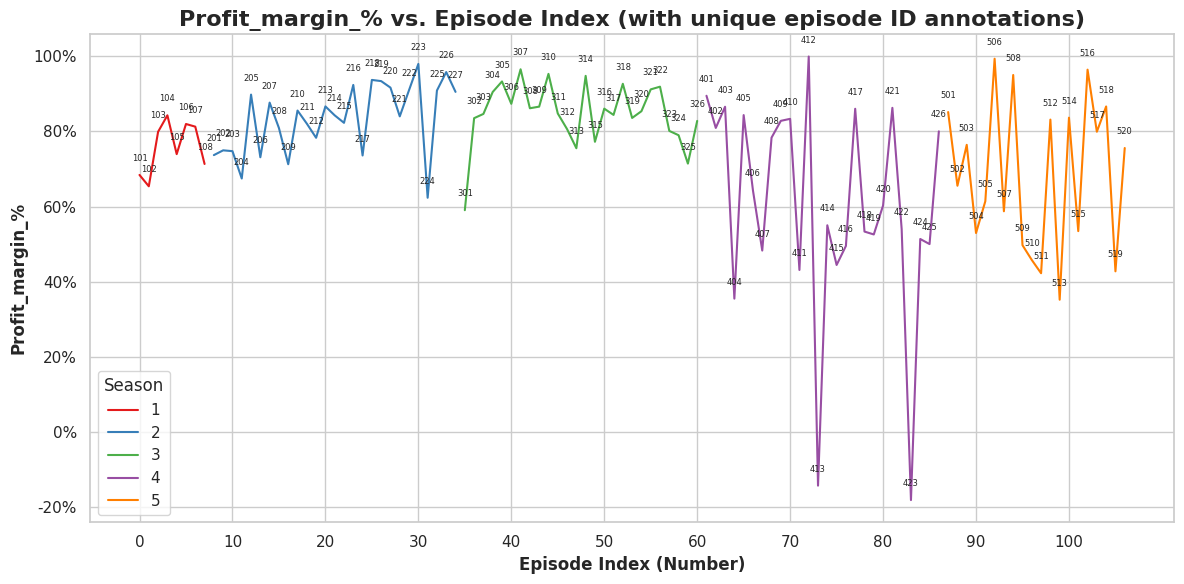

In [272]:
show_basic_feature_plot(dataframe=df_pm_roi, feature_col='profit_margin_%', unit="%")

### 1.3.1. What are the 3 Highest Profit Margin Episodes?

In [273]:
df_pm_roi.sort_values(by='profit_margin_%', ascending=False).head(3)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%
72,4,12,412,Don't Taze Me Bro,"Stanton, California",2013-04-13,5,5970,5965,99.92
92,5,6,506,Risk & Reward,"Mission Hills, California",2014-11-22,410,61550,61140,99.33
30,2,23,223,Hot Wheels,"Palm Springs, California",2011-11-01,440,21420,20980,97.95


### 1.3.2. What are the 3 Lowest Profit Margin Episodes?

In [274]:
df_pm_roi.sort_values(by='profit_margin_%', ascending=True).head(3)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%
83,4,23,423,"Cashville, Tennessee","Nashville, Tennessee",2014-03-29,12800,13375,-2425,-18.13
73,4,13,413,The Fall Guys,"Reseda, Los Angeles",2013-04-13,4000,3500,-500,-14.29
99,5,13,513,Wreck-Shaw,"Santa Clarita, California",2015-04-18,3500,5400,1900,35.19


### 1.3.3. What is the average profit margin for the entire series?

In [275]:
avg_pm_series = round(df_pm_roi.loc[:,'profit_margin_%'].mean(), 2)
print(f"The Average Profit Margin for the Auction Hunters Series is: {avg_pm_series}%.")

The Average Profit Margin for the Auction Hunters Series is: 74.73%.


### 1.3.3. What is the average profit margin per season?

In [276]:
average_profit_margin_by_season = df_pm_roi.groupby('season_num')['profit_margin_%'].mean().reset_index()
average_profit_margin_by_season['profit_margin_%'] = average_profit_margin_by_season['profit_margin_%'].round(2)
average_profit_margin_by_season

,season_num,profit_margin_%
0,1,75.80
1,2,83.32
2,3,84.77
3,4,60.27
4,5,68.44


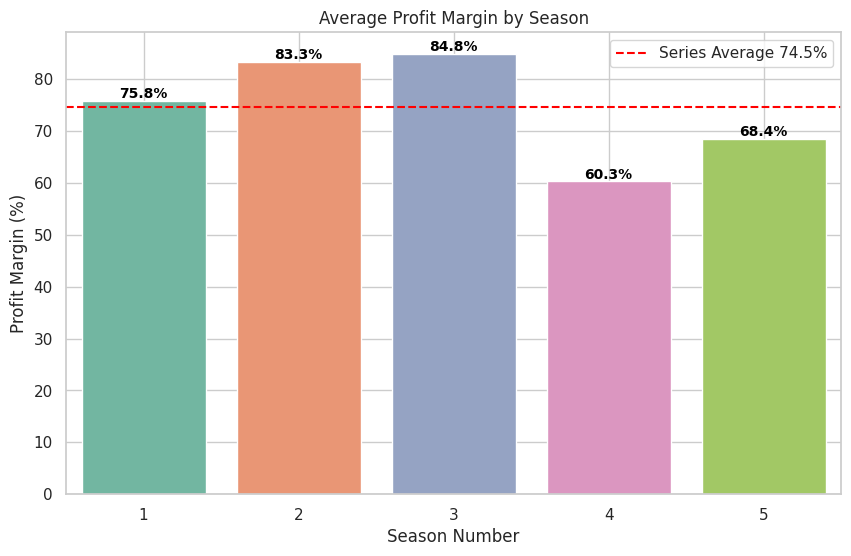

In [212]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick

# # Sample data
# data = {
#     'season_num': [1, 2, 3, 4, 5],
#     'avg_profit_margin_%': [20.5, 18.2, 21.1, 19.6, 22.3],
# }

# # Create a DataFrame
# df = pd.DataFrame(data)

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Set2", n_colors=len(average_profit_margin_by_season))

ax = sns.barplot(data=average_profit_margin_by_season, x='season_num', y='profit_margin_%', palette=colors)
plt.xlabel('Season Number')
plt.ylabel('Profit Margin (%)')

# Plot the series average value in red
avg_pm_series = average_profit_margin_by_season['profit_margin_%'].mean()
plt.axhline(y=avg_pm_series, color='red', linestyle='--', label=f'Series Average {avg_pm_series.round(1)}%')

# Annotate percentage values above each bar
for i, value in enumerate(average_profit_margin_by_season['profit_margin_%']):
    plt.text(i, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.title('Average Profit Margin by Season')
plt.grid(True)
plt.xticks(range(len(average_profit_margin_by_season)))

plt.legend()
plt.show()


In [321]:
def show_violin_plot_profit_margin(dataframe, series_average: float):
    
    plt.figure(figsize=(12, 6))

    colors = sns.color_palette("Set1", n_colors=len(dataframe['season_num'].unique()))
    ax = sns.violinplot(data=dataframe, x='season_num', y='profit_margin_%', palette=colors, inner="point", cut=0)

    plt.axhline(y=series_average, color='red', linestyle='--', label=f'Series Mean {series_average.round(1)}%')
    # plt.text(0.5, avg_pm_series, f'Series Average: {avg_pm_series:.1f}%', ha='right', va='bottom', fontsize=10, color='red')

    # Annotate mean values on the violins
    means = dataframe.groupby('season_num')['profit_margin_%'].mean()
    for i, season in enumerate(dataframe['season_num'].unique()):
        mean_value = means[season]
        plt.scatter(i, mean_value, c='white', marker='o', s=40)  # Add a dot at the mean value position
        plt.text(i-0.05, mean_value, f'{mean_value:.1f}%', ha='right', va='bottom', fontsize=9, color='black')

    ax.text(0, 2, " Note:\n The white o is the individual\n season's mean profit margin.", size=9, color='red') # 0 is the index, so it means season 1.
    plt.xlabel('Season #', weight="bold", fontsize=12)
    plt.ylabel('Profit Margin (%)', weight="bold", fontsize=12)
    plt.title('Auction Hunters: Profit Margin Distribution by Season', weight="bold", fontsize=16)
    plt.legend()
    plt.grid(True)

    plt.show()
    

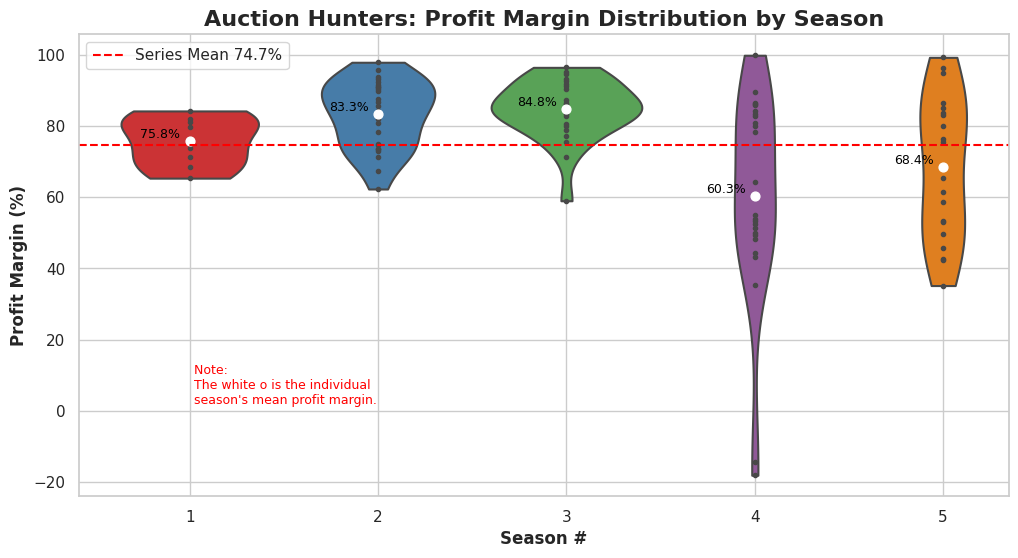

In [322]:
show_violin_plot_profit_margin(dataframe=df_pm_roi, series_average=avg_pm_series)


* 1.7. What is the relative Paid, Sold, Profit normalised for number of episodes per season?
* 1.8. What is the rank of best performing seasons using the relative scale?

## Total Expenditure, Gross Revenue and Net Profit

In [ ]:
total_expenditure_by_season = df_finance.groupby('season_num')['paid_$'].sum().reset_index()
total_expenditure_by_season.rename(columns={'paid_$': 'total_expenditure_$'}, inplace=True)

gross_revenue_by_season = df_finance.groupby('season_num')['sold_$'].sum().reset_index()
gross_revenue_by_season.rename(columns={'sold_$': 'gross_revenue_$'}, inplace=True)

net_profit_by_season = df_finance.groupby('season_num')['profit_$'].sum().reset_index()
net_profit_by_season.rename(columns={'profit_$': 'net_profit_$'}, inplace=True)

In [ ]:
temp_merge1 = total_expenditure_by_season.merge(gross_revenue_by_season, on='season_num', how='left')
df_erp = temp_merge1.merge(net_profit_by_season, on='season_num', how='left')

In [ ]:
print(df_erp)

   season_num  total_expenditure_$  gross_revenue_$  net_profit_$
0           1                 9421            39925         30404
1           2                40410           285450        244380
2           3                40287           270309        230022
3           4                78783           222045        140262
4           5                91556           362870        271314


## Cumulative Metrics

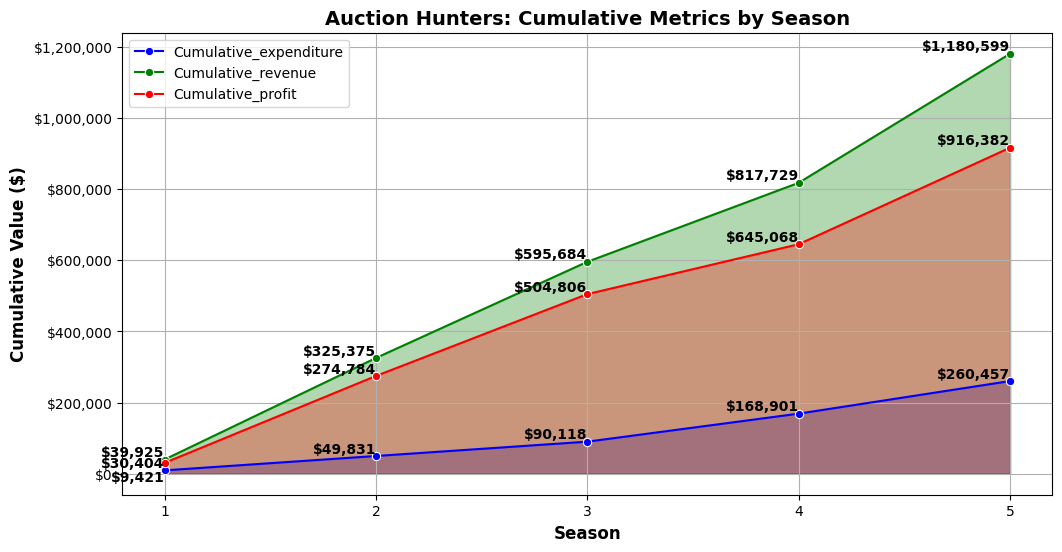

In [ ]:
def plot_cumulative_metrics(df):
    # Create a figure
    plt.figure(figsize=(12, 6))
    
    list_of_metrics = ['cumulative_expenditure', 'cumulative_revenue', 'cumulative_profit']

    # Calculate cumulative metrics
    df['cumulative_expenditure'] = df['total_expenditure_$'].cumsum()
    df['cumulative_revenue'] = df['gross_revenue_$'].cumsum()
    df['cumulative_profit'] = df['net_profit_$'].cumsum()

    # Plot cumulative paid
    ax = sns.lineplot(data=df, x='season_num', y='cumulative_expenditure', color='b', label=list_of_metrics[0].capitalize(), marker="o") # b
    ax.fill_between(df['season_num'], 0, df['cumulative_expenditure'], alpha=0.3, color='b')

    # Plot cumulative sold
    ax = sns.lineplot(data=df, x='season_num', y='cumulative_revenue', color='g', label=list_of_metrics[1].capitalize(), marker="o") # g
    ax.fill_between(df['season_num'], 0, df['cumulative_revenue'], alpha=0.3, color='g')

    # Plot cumulative profit
    ax = sns.lineplot(data=df, x='season_num', y='cumulative_profit', color='r', label=list_of_metrics[2].capitalize(), marker="o") # r
    ax.fill_between(df['season_num'], 0, df['cumulative_profit'], alpha=0.3, color='r')

    # Annotate cumsum() values at each season with $
    for metric in list_of_metrics:
        for i, value in enumerate(df[metric]):
            if i == 0:  # Check if it's season 1
                if metric == 'cumulative_expenditure':
                    plt.text(df['season_num'][i], value, f'${int(value):,}', ha='right', va='top', fontsize=10, weight="bold")
                elif metric == 'cumulative_revenue':
                    plt.text(df['season_num'][i], value, f'${int(value):,}', ha='right', va='bottom', fontsize=10, weight="bold")
                else:  # cumulative_profit
                    plt.text(df['season_num'][i], value, f'${int(value):,}', ha='right', va='center', fontsize=10, weight="bold")
            else:  # For other seasons, keep the default alignment
                plt.text(df['season_num'][i], value, f'${int(value):,}', ha='right', va='bottom', fontsize=10, weight="bold")

    plt.title('Auction Hunters: Cumulative Metrics by Season', weight="bold", fontsize=14)
    plt.xlabel('Season', fontsize=12, weight="bold")
    plt.ylabel('Cumulative Value ($)', fontsize=12, weight="bold")
    plt.xticks(range(1, 6), fontsize=10)
    plt.grid(True)  # Add grid lines
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    plt.yticks(fontsize=10)
    plt.legend()
    plt.show()

# Call the function with your DataFrame
plot_cumulative_metrics(df_erp)

... to be continued